In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Stars/'
file_path = path + '6 class csv.csv'

## Análise dos dados

In [ ]:
df = pd.read_csv(file_path)
df.shape

(240, 7)

In [ ]:
df.head(-15)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.120,0,Red,M
1,3042,0.000500,0.1542,16.600,0,Red,M
2,2600,0.000300,0.1020,18.700,0,Red,M
3,2800,0.000200,0.1600,16.650,0,Red,M
4,1939,0.000138,0.1030,20.060,0,Red,M
...,...,...,...,...,...,...,...
220,23678,244290.000000,35.0000,-6.270,4,Blue,O
221,12749,332520.000000,76.0000,-7.020,4,Blue,O
222,9383,342940.000000,98.0000,-6.980,4,Blue,O
223,23440,537430.000000,81.0000,-5.975,4,Blue,O


In [ ]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


* Verificando se há valores nulos

In [ ]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

## Tratamento dos dados

* Tratando a coluna "Star color", que possui valores duplicados e transformando em numérica

In [ ]:
df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [ ]:
df['Star color'] = df['Star color'].replace(['Blue White', 'Blue white', 'Blue white ', 'Blue-white'], 'Blue-White')
df['Star color'] = df['Star color'].replace('white', 'White')
df['Star color'] = df['Star color'].replace('Blue ', 'Blue')
df['Star color'] = df['Star color'].replace('yellowish', 'Yellowish')
df['Star color'] = df['Star color'].replace('yellow-white', 'White-Yellow')

In [ ]:
df['Star color'].unique()

array(['Red', 'Blue-White', 'White', 'Yellowish White',
       'Pale yellow orange', 'Blue', 'Whitish', 'White-Yellow', 'Orange',
       'Yellowish', 'Orange-Red'], dtype=object)

* Ordenando o dataset de acordo com a classificação estelar

In [ ]:
from pandas.api.types import CategoricalDtype

star_order = CategoricalDtype(['O', 'B', 'A', 'F', 'G', 'K', 'M'], ordered = True)
df['Spectral Class'] = df['Spectral Class'].astype(star_order)
df = df.sort_values('Spectral Class')

## Visualização dos dados

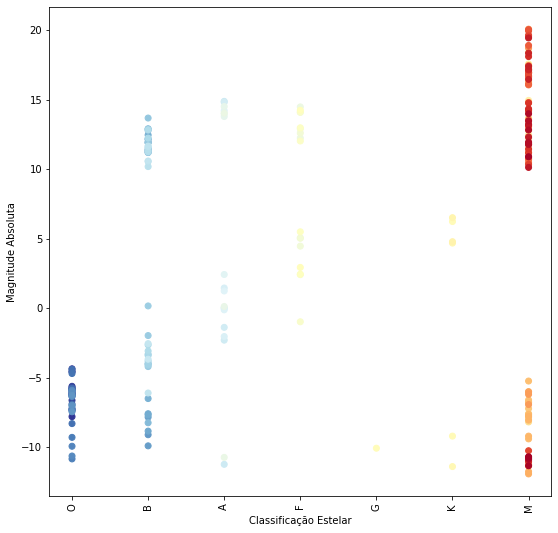

In [ ]:
classificação = df['Spectral Class']
magnitude = df['Absolute magnitude(Mv)']

plt.figure(figsize=(9,9))
plt.scatter(classificação, magnitude, c = sorted(range(240), reverse = True), cmap = 'RdYlBu')
plt.xticks(rotation=90)
plt.xlabel('Classificação Estelar')
plt.ylabel('Magnitude Absoluta')
plt.show()

<function matplotlib.pyplot.show>

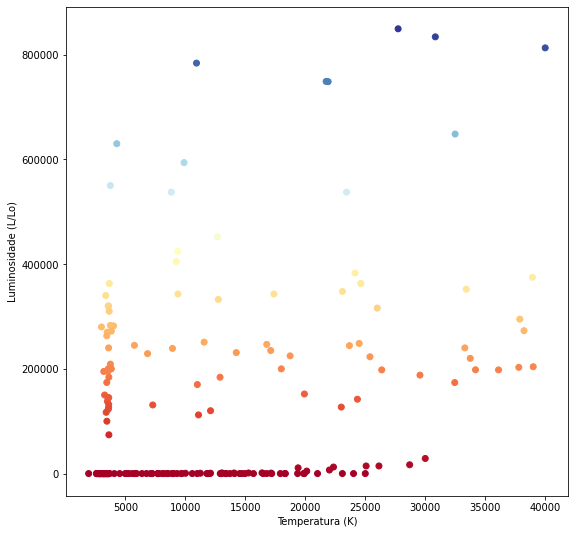

In [ ]:
temp = df['Temperature (K)']
luminosidade = df['Luminosity(L/Lo)']
plt.figure(figsize=(9,9))
plt.scatter(temp, luminosidade, c = df['Luminosity(L/Lo)'], cmap = 'RdYlBu')
plt.xlabel('Temperatura (K)')
plt.ylabel('Luminosidade (L/Lo)')
plt.show

In [ ]:
x = df['Temperature (K)']
y = df['Absolute magnitude(Mv)']
z = df['Spectral Class']


fig = px.scatter_3d(df, x=x, y=y, z=z, color= sorted(range(240)), template = 'plotly_dark', title = '3D Hertzsprung-Russell Diagram')
fig.update(layout_coloraxis_showscale=False)
fig.show()

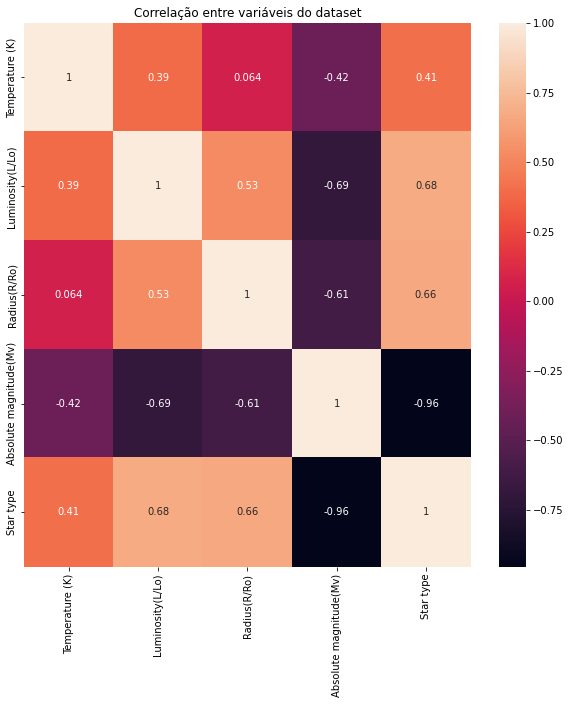

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlação entre variáveis do dataset')
plt.show()

## Criando o modelo

In [ ]:
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

In [ ]:
features

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
239,37882,294903.000,1783.000,-7.800,5,Blue
215,32460,173800.000,6.237,-4.360,3,Blue
214,34190,198200.000,6.390,-4.570,3,Blue
161,11567,251000.000,36.000,-6.245,4,Blue
162,12675,452000.000,83.000,-5.620,4,Blue
...,...,...,...,...,...,...
110,3459,100000.000,1289.000,-10.700,5,Red
111,3605,126000.000,1124.000,-10.810,5,Red
112,3615,200000.000,1635.000,-11.330,5,Red
74,3550,0.004,0.291,10.890,1,Red


In [ ]:
labels

239    O
215    O
214    O
161    O
162    O
      ..
110    M
111    M
112    M
74     M
119    M
Name: Spectral Class, Length: 240, dtype: category
Categories (7, object): ['O' < 'B' < 'A' < 'F' < 'G' < 'K' < 'M']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = features[['Star color']]
df1['Star'] = le.fit_transform(features['Star color'])
features['Star color'] = df1['Star']
features['Star color']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



239    0
215    0
214    0
161    0
162    0
      ..
110    5
111    5
112    5
74     5
119    5
Name: Star color, Length: 240, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels)

* Aplicando Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
lista_est = [100, 200, 350, 500]
list_leaf = [2, 4, 6, 8]
list_depth = [3, 7, 9]

In [ ]:
parametros_grid = dict(n_estimators = lista_est, min_samples_leaf = list_leaf, max_depth = list_depth)

In [ ]:
classifier = RandomForestClassifier()
grid = GridSearchCV(classifier, parametros_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



{'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 200}


In [ ]:
rf = RandomForestClassifier(max_depth = 7, min_samples_leaf = 4, n_estimators = 200)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

* Aplicando SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', gamma = 0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Avaliando os modelos

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

* SVM

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average="macro"))
print('Recall: ', recall_score(y_test, y_pred, average="macro"))
print('F1 Score: ', f1_score(y_test, y_pred, average="macro")) 

Accuracy:  0.85
Precision:  0.7112244897959183
Recall:  0.6634199134199135
F1 Score:  0.6382553021208484


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



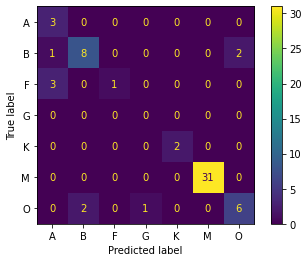

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

* Random Forest

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_rf_pred))
print('Precision: ', precision_score(y_test, y_rf_pred, average="macro"))
print('Recall: ', recall_score(y_test, y_rf_pred, average="macro")) 
print('F1 Score: ', f1_score(y_test, y_rf_pred, average="macro"))

Accuracy:  0.9666666666666667
Precision:  0.953125
Recall:  0.875
F1 Score:  0.8941798941798941


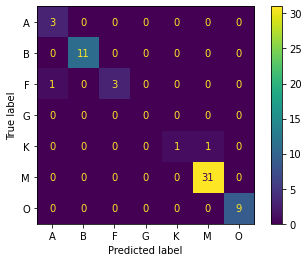

In [ ]:
cm = confusion_matrix(y_test, y_rf_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()